In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'S': [100, 110, 121, 110, 132, 105, 112, 105],
    },
index=list(range(8)))
df

,S
0,100
1,110
2,121
3,110
4,132
5,105
6,112
7,105


In [3]:
df['discrete_returns'] = df.S.pct_change()
df

,S,discrete_returns
0,100,NaN
1,110,0.100000
2,121,0.100000
3,110,-0.090909
4,132,0.200000
5,105,-0.204545
6,112,0.066667
7,105,-0.062500


In [4]:
# use prices and 
df['log_returns'] = np.log(df.S).diff()
df['log_returns_alt'] = np.log(df.discrete_returns.dropna()+1)
df['discrete_returns_from_log'] = np.exp(df.log_returns) - 1
df

,S,discrete_returns,log_returns,log_returns_alt,discrete_returns_from_log
0,100,NaN,NaN,NaN,NaN
1,110,0.100000,0.095310,0.095310,0.100000
2,121,0.100000,0.095310,0.095310,0.100000
3,110,-0.090909,-0.095310,-0.095310,-0.090909
4,132,0.200000,0.182322,0.182322,0.200000
5,105,-0.204545,-0.228842,-0.228842,-0.204545
6,112,0.066667,0.064539,0.064539,0.066667
7,105,-0.062500,-0.064539,-0.064539,-0.062500


In [5]:
df = pd.DataFrame({
    'A': [100, 110, 121, 110, 132, 105, 112, 105],
    'B': [200, 180, 194, 198, 197, 205, 208, 215],
    },
index=list(range(8)))
df

,A,B
0,100,200
1,110,180
2,121,194
3,110,198
4,132,197
5,105,205
6,112,208
7,105,215


In [6]:
df['A_return'] = df.A.pct_change()
df['B_return'] = df.B.pct_change()
df['pf_return'] = np.round((220/400) * df.A_return + (180/400) * df.B_return, 4)
df

,A,B,A_return,B_return,pf_return
0,100,200,NaN,NaN,NaN
1,110,180,0.100000,-0.100000,0.0100
2,121,194,0.100000,0.077778,0.0900
3,110,198,-0.090909,0.020619,-0.0407
4,132,197,0.200000,-0.005051,0.1077
5,105,205,-0.204545,0.040609,-0.0942
6,112,208,0.066667,0.014634,0.0433
7,105,215,-0.062500,0.033654,-0.0192


In [7]:
import yfinance as yf

msft = yf.Ticker('MSFT').history(start="2020-01-01")

In [8]:
msft = msft[['Close']]
msft['daily_return'] = msft['Close'].pct_change()
msft.dropna(inplace=True)

In [9]:
avg_return = msft.daily_return.mean()
vola = msft.daily_return.std()
skew = msft.daily_return.skew()
kurtis = msft.daily_return.kurt()


print(f'average return {np.round(avg_return,4)}')
print(f'volatility {np.round(vola, 4)}')
print(f'skewness {np.round(skew, 4)}')
print(f'kurtosis {np.round(kurtis, 4)}')

average return 0.0009
volatility 0.0218
skewness -0.0121
kurtosis 6.2978


<AxesSubplot:xlabel='Date'>

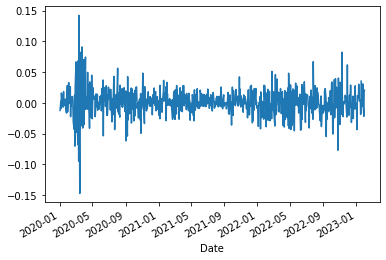

In [10]:
msft.daily_return.plot()

<AxesSubplot:xlabel='daily_return', ylabel='Count'>

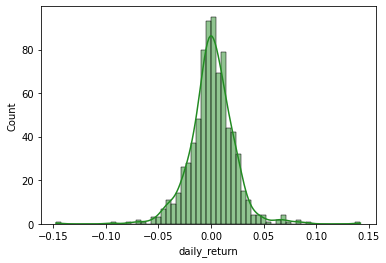

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(msft.daily_return, color='forestgreen', kde = True)

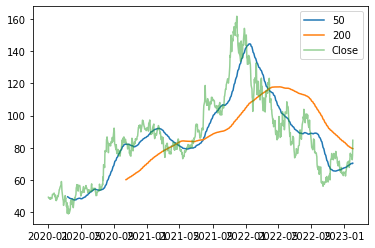

In [12]:
mmm = yf.Ticker('AMD').history(start="2020-01-01")
mmm['SMA_50'] = mmm.Close.rolling(50).mean()
mmm['SMA_200'] = mmm.Close.rolling(200).mean()

plt.figure()
plt.plot(mmm.SMA_50, label='50')
plt.plot(mmm.SMA_200, label='200')
plt.plot(mmm.Close, label='Close', alpha=.5)
plt.legend()
plt.show()

In [13]:
import pandas as pd
df = yf.Ticker('AAPL').history(start='2021-01-01')
df.reset_index(inplace=True, drop=True)

def awe_osc(high, low, fast=5, slow=34):
    if slow < fast:
        fast, slow = slow, fast
        
    median_price = 0.5 * (high + low)
    fast_sma = median_price.rolling(fast).mean()
    slow_sma = median_price.rolling(slow).mean()
    ao = fast_sma - slow_sma

    # Name and Categorize it
    ao.name = f"AO_{fast}_{slow}"
    return pd.DataFrame(ao)

ao = awe_osc(df.High, df.Low)

In [14]:
ao[30:35]

,AO_5_34
30,NaN
31,NaN
32,NaN
33,-2.884501
34,-5.013308


In [15]:
ao['shift_diff'] = ao > ao.shift()

<AxesSubplot:>

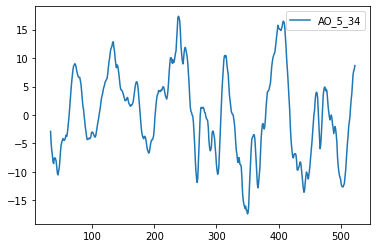

In [16]:
ao.plot()

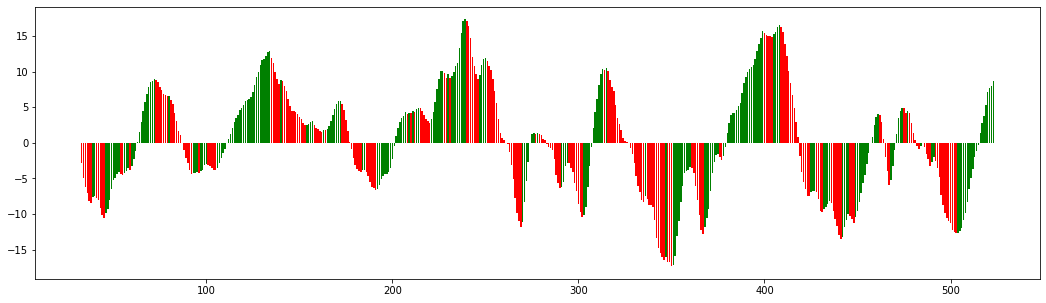

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))
plt.bar(ao[ao.shift_diff==1].index, ao[ao.shift_diff==1].AO_5_34, color='green')
plt.bar(ao[ao.shift_diff==0].index, ao[ao.shift_diff==0].AO_5_34, color='red')
plt.show()

ao['signal'] = ao.shift_diff.astype(int)